<b>Credit Card Project Part III: An Interpretable ML Model</b>

This project uses credit card data for 30,000 anonymous credit card clients in Taiwan. It presents information on the customers (education, sex, marital status, age) and their behavior for a six-month period from April 2005 to September 2005. The information was [downloaded in CSV format from Kaggle](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset), and according to the information provided it was uploaded from the UC Irvine Machine Learning Repository.

[<b>Part I</b>](https://github.com/dr-mentaculus/Credit_Card_Project/blob/main/credit_card_Part_I.ipynb) provides an opportunity to practice using Machine Learning algorithms and Feature Engineering. [<b>Part II</b>](https://github.com/dr-mentaculus/Credit-Card-Project/blob/main/credit_card_project_tests.ipynb) provides an opportunity to practice running statistical tests and simulations. <b>Part III</b>, the project presented here, is a continuation of part I. It focuses on designing a model that sacrifices predictive performance for easier interpretability. [A PowerPoint summary](https://www.dropbox.com/sh/38tcjlw7gb7bvka/AABsPtsNWq7yXZpuBqO1-_qNa?dl=0) of this project is also available. Part IV will be up soon.

<b>Goals</b>

Our previous machine learning models aimed at predictive power. That predictive power comes, however, at some cost to interpretability. The logistic regression model relied on processing of the data--normalizing it, scaling it, and decomposing it into principal components. The random forest model identifies which features are most important for us, but does not provide more specific information about how they determine the probability that a given customer defaults.

The goal here will be to train a much sparser logistic regression model, so that we can identify a linear relationship between some subset of the variables and the probability of the outcomes. This model will have less predictive power, but it will be in some ways more informative about the relationship between (some of) the features and the target.

<b>Method</b>

I will start by retraining the random forest model that had the best performance in [Part I](https://github.com/dr-mentaculus/Credit_Card_Project/blob/main/credit_card_Part_I.ipynb). I will use this model to identify some of the most important candidate features for the sparse logistic regression model. Some of these features will have to be dropped to avoid overly high levels of colinearity (we will not use PCA to process the data, and so must drop overly correlated features manually). The resulting model will have decent predictive performance. Unfortunately, it fails to meet all of the assumptions of the logistic regression model--assumptions that become more important given the goal of interpretability.

This will lead to a final very sparse model. The predictive power of this model is more modest, but it does tell us something more informative about the relationship between missing past payments and the likelihood of future default.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

starting_data = pd.read_csv("https://github.com/dr-mentaculus/Credit_Card_Project/blob/main/UCI_Credit_Card.csv?raw=True")

len(starting_data)

30000

Because the credit card data contains 30000 samples, we can afford to set some aside as the final test dataset. I will separate this data (15%) from the rest now. I will not look at it or use it for model selection. It will be used to test the performance of the final models.

In [5]:
hermetically_sealed_data = starting_data.sample(n=4500, replace=False, random_state=177)

starting_data = starting_data[~starting_data.index.isin(hermetically_sealed_data.index)]

In [6]:
len(starting_data), len(hermetically_sealed_data)

(25500, 4500)

<b>For More Information on this Data</b>

Some information is below. For more information, see [Part I](https://github.com/dr-mentaculus/Credit_Card_Project/blob/main/credit_card_Part_I.ipynb).

<b>Some Information on the Columns</b>

The following information about the columns was provided to accompany the Kaggle Dataset.

There are 25 variables:

•	ID: ID of each client

•	LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

•	SEX: Gender (1=male, 2=female)

•	EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

•	MARRIAGE: Marital status (1=married, 2=single, 3=others)

•	AGE: Age in years

•	PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

•	PAY_2: Repayment status in August, 2005 (scale same as above)

•	PAY_3: Repayment status in July, 2005 (scale same as above)

•	PAY_4: Repayment status in June, 2005 (scale same as above)

•	PAY_5: Repayment status in May, 2005 (scale same as above)

•	PAY_6: Repayment status in April, 2005 (scale same as above)

•	BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

•	BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

•	BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

•	BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

•	BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

•	BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

•	PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

•	PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

•	PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

•	PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

•	PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

•	PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

•	default.payment.next.month: Default payment (1=yes, 0=no)

In [8]:
from ipynb.fs.defs.classes_n_functions import data_processing
X2, y2 = data_processing(starting_data)


In [11]:
# retraining the Random Forest model
#Please ignore the message about the missing HTML image. It's just a box saying that the
#gridsearch is complete.

from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=31)

classifier2 = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=21)
grid_params4 = {"max_depth": [4, 5, 6, 7, 8, 9, 10, 11, 12, 15], "class_weight": [None, "balanced"]}

gridsearch4 = GridSearchCV(estimator=classifier2, param_grid=grid_params4, scoring="roc_auc")

gridsearch4.fit(X2_train, y2_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=200, n_jobs=-1,
                                              random_state=21),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15]},
             scoring='roc_auc')

In [12]:
gridsearch4.best_params_

{'class_weight': None, 'max_depth': 11}

In [13]:
gridsearch4.cv_results_

{'mean_fit_time': array([1.67217913, 1.14120078, 1.24636741, 1.37493281, 1.51009359,
        1.63125215, 1.81162944, 1.92116265, 1.89370503, 2.15393662,
        0.9354156 , 1.03108249, 1.17005582, 1.35400109, 1.46258678,
        1.68475218, 1.84609213, 2.09475288, 3.10661321, 2.55254383]),
 'std_fit_time': array([1.05774197, 0.05367436, 0.0095176 , 0.03981883, 0.02598088,
        0.02428604, 0.07198298, 0.25382552, 0.04875335, 0.07214434,
        0.02252606, 0.00658322, 0.01971877, 0.13786417, 0.02607233,
        0.05031049, 0.04590464, 0.25322951, 0.59473295, 0.06159962]),
 'mean_score_time': array([0.08276262, 0.07722645, 0.07778873, 0.08165464, 0.08357158,
        0.07857208, 0.08318729, 0.08619485, 0.07893581, 0.0799315 ,
        0.07528324, 0.07439599, 0.07549019, 0.08037286, 0.09134684,
        0.1081233 , 0.09749198, 0.10507021, 0.14536481, 0.11819172]),
 'std_score_time': array([0.00579857, 0.00211636, 0.00458883, 0.00648305, 0.00454276,
        0.00251057, 0.00393044, 0.008726

In [14]:
#getting most importance features

best_forest2 = gridsearch4.best_estimator_

important2 = best_forest2.feature_importances_

<IPython.core.display.Javascript object>


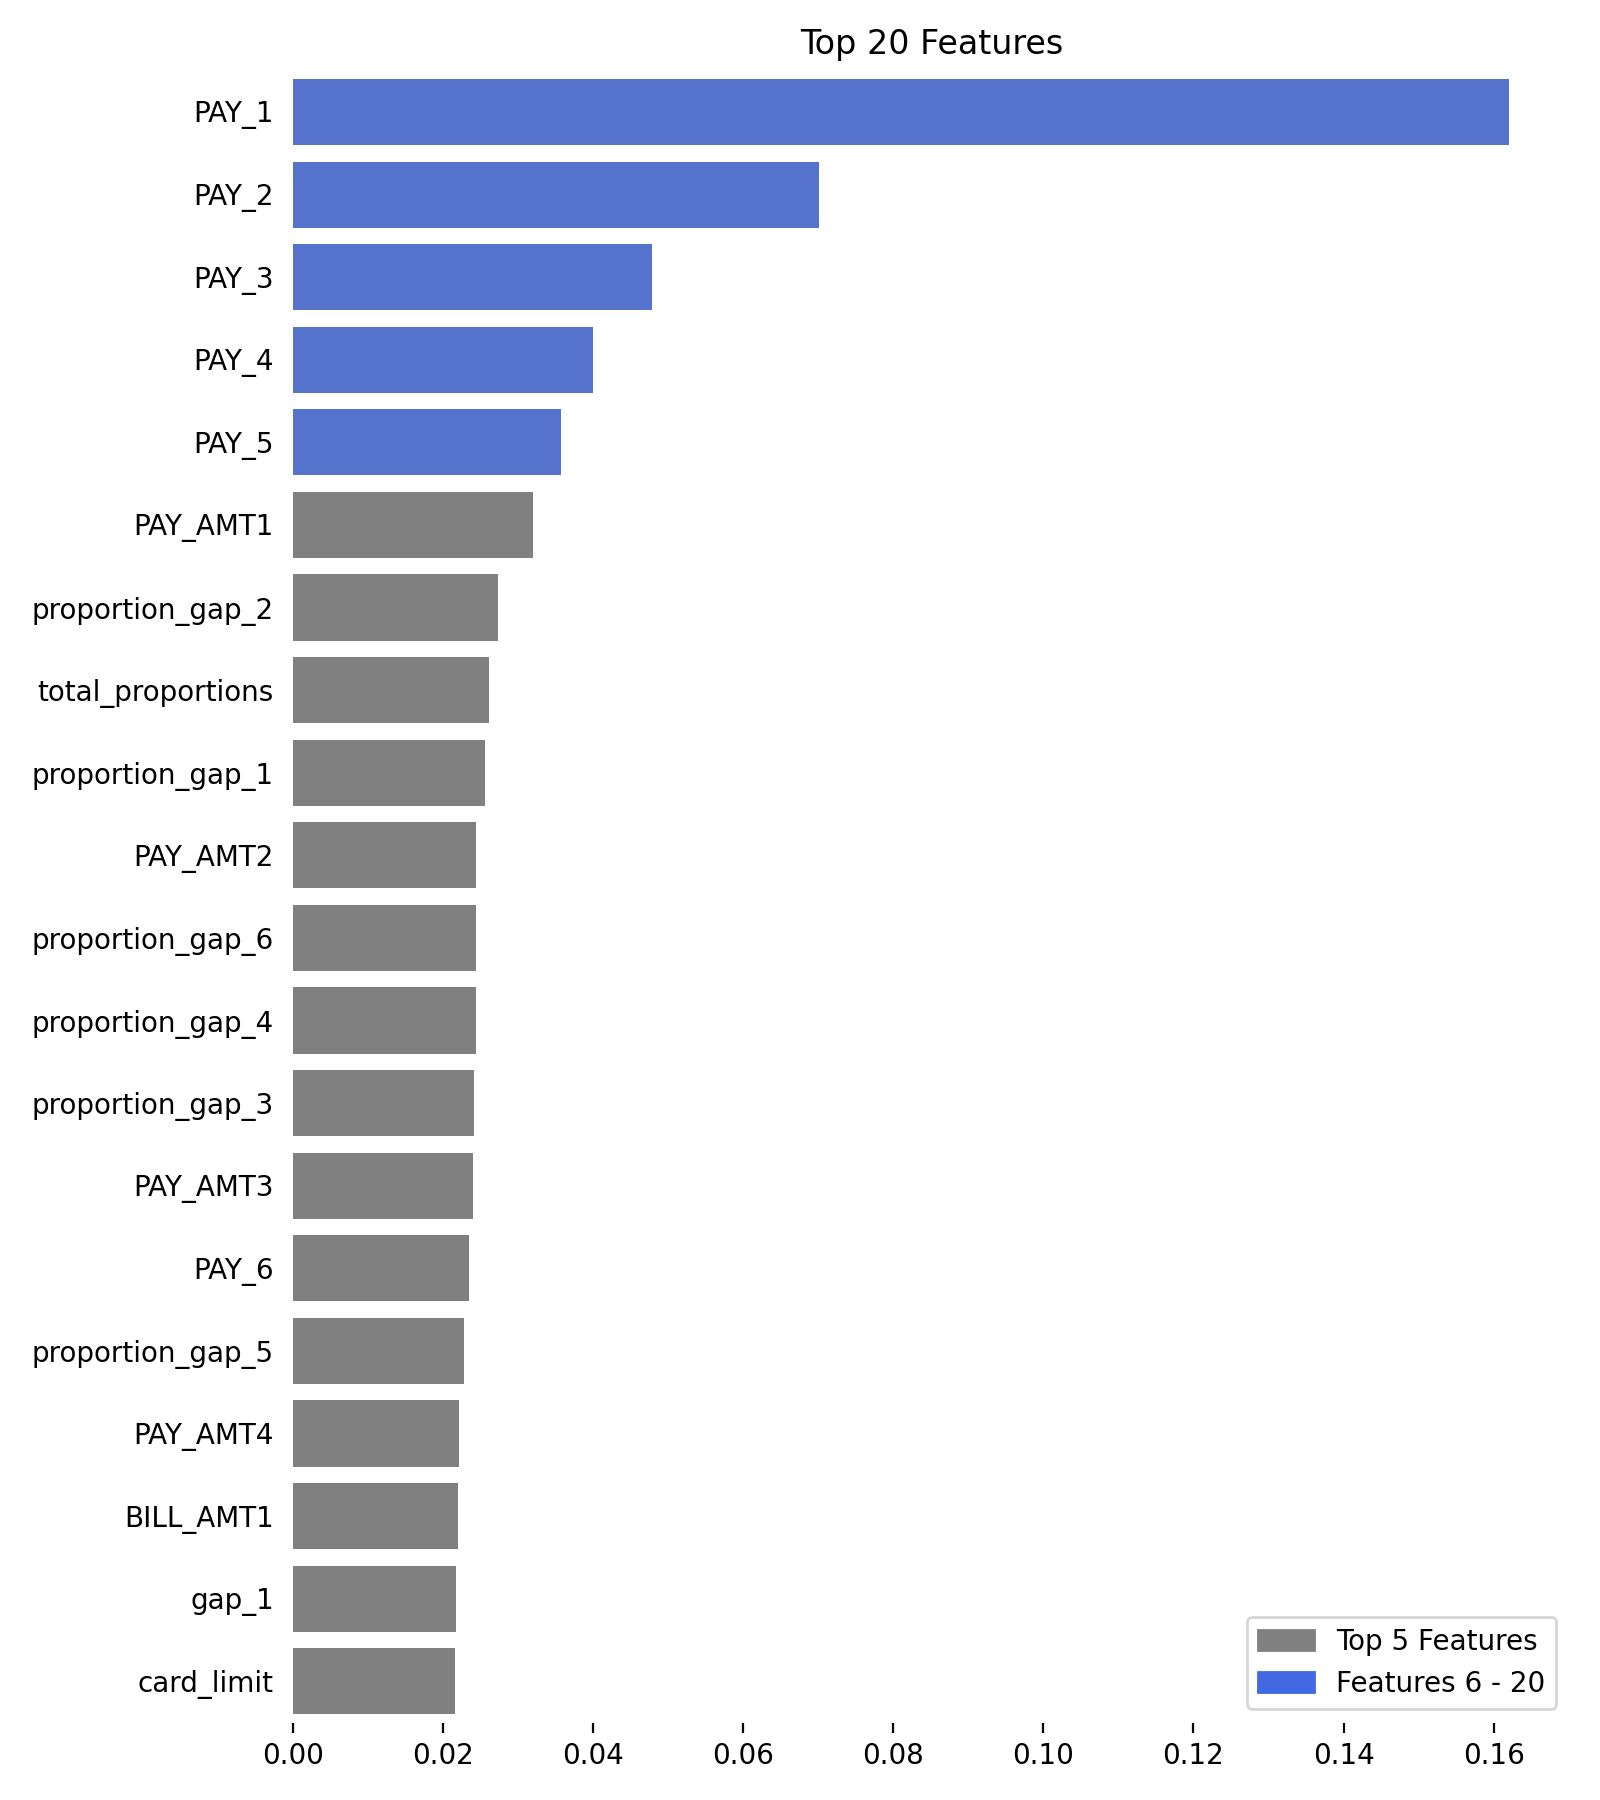

In [16]:
#plotting them

from matplotlib import patches as mpatches

%matplotlib notebook
plt.figure(figsize=(8, 9))
k2 = np.argsort(important2)
top_five2 = ["royalblue"]*5 + ["grey"]*30


sns.barplot(x=important2[k2][37:][::-1],
            y=X2_train.columns[k2][37:][::-1], palette=top_five2)
plt.tick_params(left=False)
plt.box(False)
plt.title("Top 20 Features")
handles = [mpatches.Patch(color=shade) for shade in set(top_five2)]
plt.legend(handles, ["Top 5 Features", "Features 6 - 20"])
plt.tight_layout()
#plt.savefig("top_features.png", dpi=200)

<b>Training the Interpretable Model</b>

I will start by using the important features identified by the Random Forest model to cut down on the number of features under consideration.

I will also score this model using accuracy, as we are hoping to make claims about the odds that a given customer defaults.

In [17]:
#getting the most important columns. I will be feeding this back into the dataframe
#in order to reduce the number of features under consideration.

col_array = np.array(X2.columns)

important_columns = col_array[k2[::-1]]
important_columns

array(['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_AMT1',
       'proportion_gap_2', 'total_proportions', 'proportion_gap_1',
       'PAY_AMT2', 'proportion_gap_6', 'proportion_gap_4',
       'proportion_gap_3', 'PAY_AMT3', 'PAY_6', 'proportion_gap_5',
       'PAY_AMT4', 'BILL_AMT1', 'gap_1', 'card_limit', 'BILL_AMT2',
       'gap_2', 'age', 'BILL_AMT3', 'PAY_AMT5', 'gap_3', 'gap_4',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'gap_6', 'gap_5',
       'PAY_AMT6', 'married', 'single', 'sex', 'undergraduate',
       'postgraduate', 'high_school', 'paid_balance_5', 'paid_balance_2',
       'paid_balance_6', 'paid_balance_3', 'paid_balance_1',
       'paid_balance_4', 'no_balance_6', 'no_balance_5', 'no_balance_1',
       'no_balance_3', 'divorced', 'no_balance_2', 'no_balance_4',
       'other_marital', 'edu_other_3', 'edu_other_4', 'edu_other_2',
       'edu_other_1'], dtype=object)

In [18]:
#these are the 33 most important features

important_columns[:33]

array(['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_AMT1',
       'proportion_gap_2', 'total_proportions', 'proportion_gap_1',
       'PAY_AMT2', 'proportion_gap_6', 'proportion_gap_4',
       'proportion_gap_3', 'PAY_AMT3', 'PAY_6', 'proportion_gap_5',
       'PAY_AMT4', 'BILL_AMT1', 'gap_1', 'card_limit', 'BILL_AMT2',
       'gap_2', 'age', 'BILL_AMT3', 'PAY_AMT5', 'gap_3', 'gap_4',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'gap_6', 'gap_5',
       'PAY_AMT6'], dtype=object)

In [19]:
#reducing the dataframe to 33 features

Xint = X2[list(important_columns[:33])].copy()
Xint.head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_AMT1,proportion_gap_2,total_proportions,proportion_gap_1,PAY_AMT2,...,BILL_AMT3,PAY_AMT5,gap_3,gap_4,BILL_AMT4,BILL_AMT5,BILL_AMT6,gap_6,gap_5,PAY_AMT6
0,2,2,0,0,0,0.0,0.120650,0.350750,0.19565,689.0,...,689.0,0.0,689.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2,0,0,0,0.0,0.006042,0.100642,0.02235,1000.0,...,2682.0,0.0,1682.0,2272.0,3272.0,3455.0,3261.0,1261.0,3455.0,2000.0
3,0,0,0,0,0,2000.0,0.924280,4.458920,0.89980,2019.0,...,49291.0,1069.0,48091.0,27214.0,28314.0,28959.0,29547.0,28547.0,27890.0,1000.0
4,0,0,0,0,0,2000.0,-0.620220,1.005800,0.13234,36681.0,...,35835.0,689.0,25835.0,11940.0,20940.0,19146.0,19131.0,18452.0,18457.0,679.0
5,0,0,0,0,0,2500.0,1.105080,4.606840,1.23800,1815.0,...,57608.0,1000.0,56951.0,18394.0,19394.0,19619.0,20024.0,19224.0,18619.0,800.0


<b>Collinearity</b>

Now it's time to check for collinearity in the remaining columns. I will not be putting the data through PCA this time, so variables with high collinearity will need to be dealt with manually.

<IPython.core.display.Javascript object>


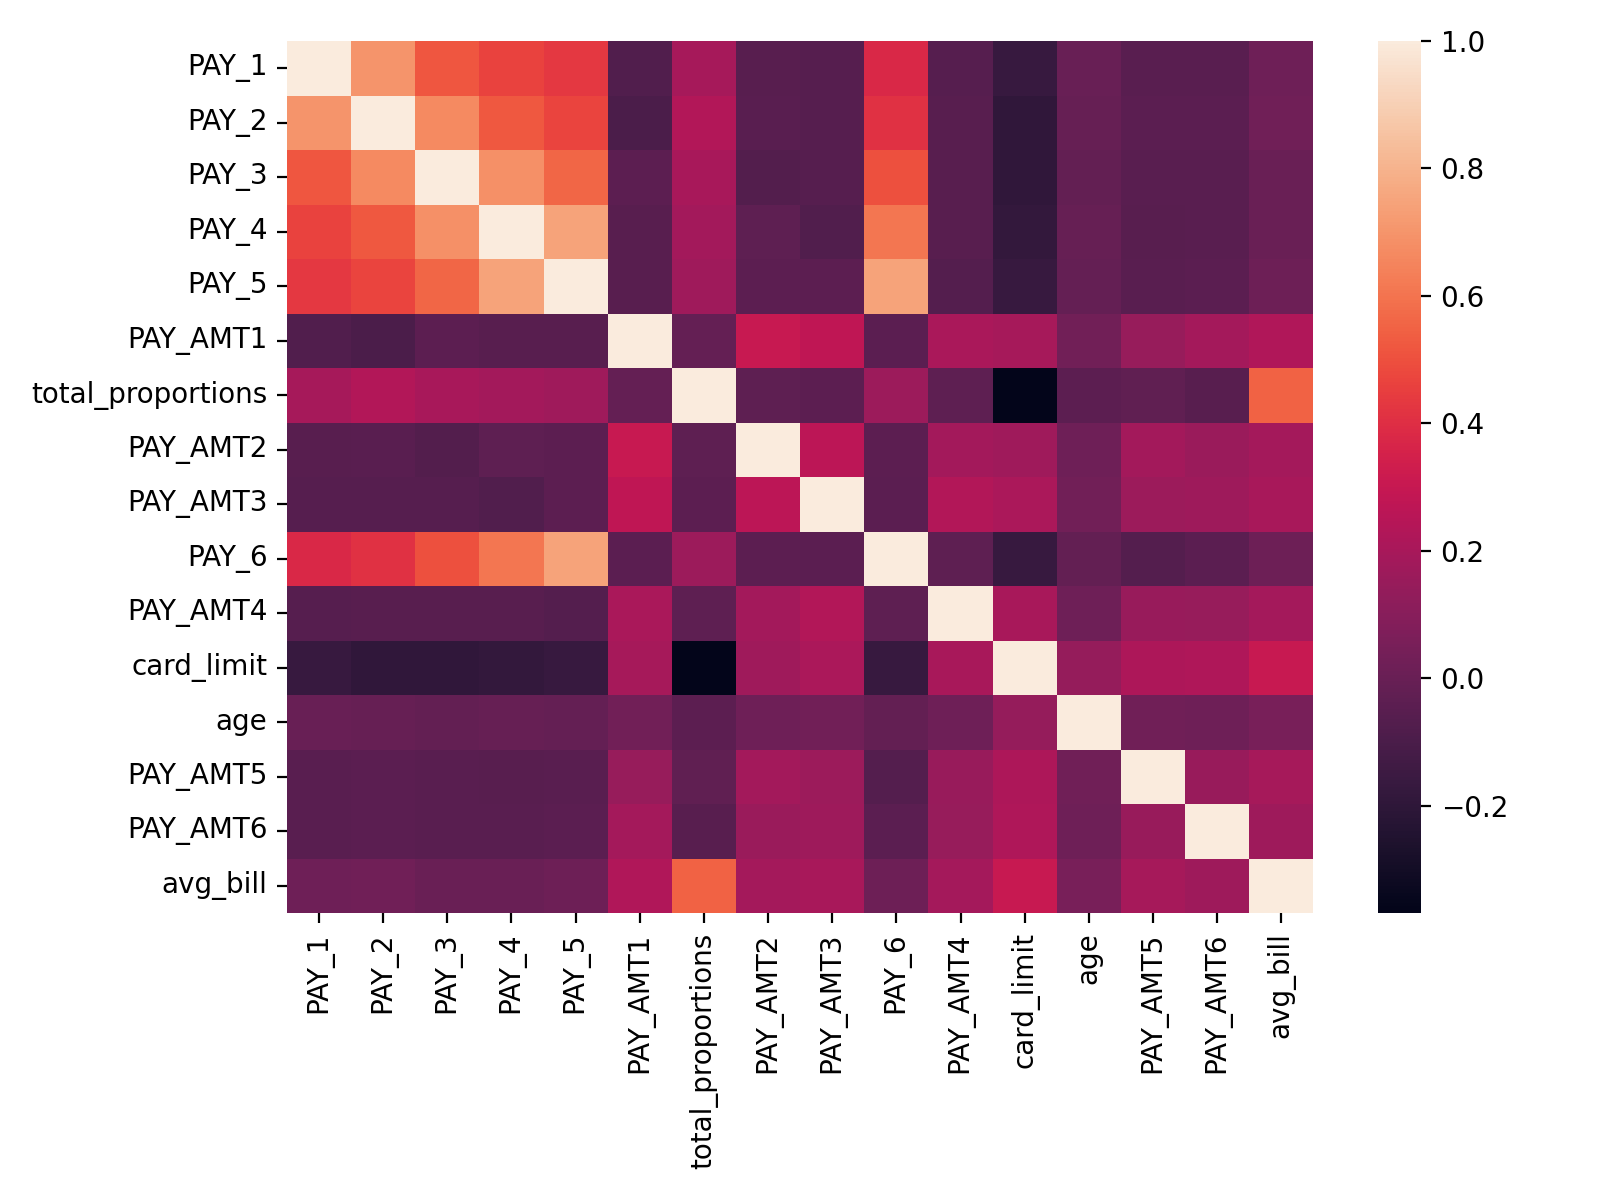

In [79]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(Xint.corr(), ax=ax)
plt.tight_layout()
#plt.savefig("heatmap.png", dpi=300)

I'll admit, I'm not finding the heatmap above very helpful. Let me try something else.

In [21]:
(Xint.corr()>.9).sum()

PAY_1                1
PAY_2                1
PAY_3                1
PAY_4                1
PAY_5                1
PAY_AMT1             1
proportion_gap_2     1
total_proportions    3
proportion_gap_1     1
PAY_AMT2             1
proportion_gap_6     1
proportion_gap_4     2
proportion_gap_3     2
PAY_AMT3             1
PAY_6                1
proportion_gap_5     1
PAY_AMT4             1
BILL_AMT1            3
gap_1                2
card_limit           1
BILL_AMT2            4
gap_2                2
age                  1
BILL_AMT3            4
PAY_AMT5             1
gap_3                2
gap_4                2
BILL_AMT4            5
BILL_AMT5            4
BILL_AMT6            3
gap_6                2
gap_5                3
PAY_AMT6             1
dtype: int64

In [22]:
#Which pairs of features have correlations > .9?

k = Xint.corr()

for name1 in k.index:
    for name2 in k.columns:
        if k.loc[name1, name2] > .9 and name1 != name2:
            print(name1, name2, k.loc[name1, name2])

total_proportions proportion_gap_4 0.9016860681102945
total_proportions proportion_gap_3 0.9037307813144153
proportion_gap_4 total_proportions 0.9016860681102945
proportion_gap_3 total_proportions 0.9037307813144153
BILL_AMT1 gap_1 0.9741036319289746
BILL_AMT1 BILL_AMT2 0.9515323740585022
gap_1 BILL_AMT1 0.9741036319289746
BILL_AMT2 BILL_AMT1 0.9515323740585022
BILL_AMT2 gap_2 0.9441449411638676
BILL_AMT2 BILL_AMT3 0.9272817475716998
gap_2 BILL_AMT2 0.9441449411638676
BILL_AMT3 BILL_AMT2 0.9272817475716998
BILL_AMT3 gap_3 0.9698687231958586
BILL_AMT3 BILL_AMT4 0.922483538802159
gap_3 BILL_AMT3 0.9698687231958586
gap_4 BILL_AMT4 0.9691873750043222
BILL_AMT4 BILL_AMT3 0.922483538802159
BILL_AMT4 gap_4 0.9691873750043222
BILL_AMT4 BILL_AMT5 0.939012492388593
BILL_AMT4 gap_5 0.9015716723302454
BILL_AMT5 BILL_AMT4 0.939012492388593
BILL_AMT5 BILL_AMT6 0.945785310340136
BILL_AMT5 gap_5 0.9680358649430468
BILL_AMT6 BILL_AMT5 0.945785310340136
BILL_AMT6 gap_6 0.9561915348228662
gap_6 BILL_AMT6

In [24]:
#Which of those features should I try to avoid dropping, because they have a high correlation
#with the target?

Xint["defaulted"] = y2

Xint.corr()["defaulted"]

PAY_1                0.394923
PAY_2                0.324759
PAY_3                0.284189
PAY_4                0.268572
PAY_5                0.264284
PAY_AMT1            -0.075714
proportion_gap_2     0.104843
total_proportions    0.123617
proportion_gap_1     0.091461
PAY_AMT2            -0.058302
proportion_gap_6     0.122246
proportion_gap_4     0.115665
proportion_gap_3     0.104250
PAY_AMT3            -0.057904
PAY_6                0.245937
proportion_gap_5     0.120068
PAY_AMT4            -0.056626
BILL_AMT1           -0.018550
gap_1               -0.001369
card_limit          -0.151570
BILL_AMT2           -0.012532
gap_2                0.007062
age                  0.013946
BILL_AMT3           -0.012635
PAY_AMT5            -0.058414
gap_3                0.001572
gap_4                0.005621
BILL_AMT4           -0.008435
BILL_AMT5           -0.004651
BILL_AMT6           -0.003857
gap_6                0.012181
gap_5                0.010132
PAY_AMT6            -0.054303
defaulted 

In [25]:
Xint.drop(columns="defaulted", inplace=True)

<b>BILL_AMT and gap</b>

I will drop the BILL_AMT{X) and gap_{X} values and replace them with averages. I will also drop the proportion_gap_{X} values, since 2 of them correlated with total_proportions.

In [26]:
d = Xint[[f"BILL_AMT{N}" for N in range(1,7)]].mean(axis=1)

Xint["avg_bill"] = d

In [27]:
d2 = Xint[[f"gap_{N}" for N in range(1,7)]].mean(axis=1)
Xint["avg_gap"] = d2
Xint.head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_AMT1,proportion_gap_2,total_proportions,proportion_gap_1,PAY_AMT2,...,gap_3,gap_4,BILL_AMT4,BILL_AMT5,BILL_AMT6,gap_6,gap_5,PAY_AMT6,avg_bill,avg_gap
0,2,2,0,0,0,0.0,0.120650,0.350750,0.19565,689.0,...,689.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1284.000000,1169.166667
1,0,2,0,0,0,0.0,0.006042,0.100642,0.02235,1000.0,...,1682.0,2272.0,3272.0,3455.0,3261.0,1261.0,3455.0,2000.0,2846.166667,2012.833333
3,0,0,0,0,0,2000.0,0.924280,4.458920,0.89980,2019.0,...,48091.0,27214.0,28314.0,28959.0,29547.0,28547.0,27890.0,1000.0,38555.666667,37157.666667
4,0,0,0,0,0,2000.0,-0.620220,1.005800,0.13234,36681.0,...,25835.0,11940.0,20940.0,19146.0,19131.0,18452.0,18457.0,679.0,18223.166667,8381.666667
5,0,0,0,0,0,2500.0,1.105080,4.606840,1.23800,1815.0,...,56951.0,18394.0,19394.0,19619.0,20024.0,19224.0,18619.0,800.0,39685.666667,38390.333333


In [28]:
Xint.drop(columns=([f"BILL_AMT{N}" for N in range(1,7)]+[f"gap_{N}" for N in range(1,7)]
                  +[f"proportion_gap_{N}" for N in range(1,7)]), inplace=True)

Xint.head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_AMT1,total_proportions,PAY_AMT2,PAY_AMT3,PAY_6,PAY_AMT4,card_limit,age,PAY_AMT5,PAY_AMT6,avg_bill,avg_gap
0,2,2,0,0,0,0.0,0.350750,689.0,0.0,0,0.0,20000.0,24,0.0,0.0,1284.000000,1169.166667
1,0,2,0,0,0,0.0,0.100642,1000.0,1000.0,2,1000.0,120000.0,26,0.0,2000.0,2846.166667,2012.833333
3,0,0,0,0,0,2000.0,4.458920,2019.0,1200.0,0,1100.0,50000.0,37,1069.0,1000.0,38555.666667,37157.666667
4,0,0,0,0,0,2000.0,1.005800,36681.0,10000.0,0,9000.0,50000.0,57,689.0,679.0,18223.166667,8381.666667
5,0,0,0,0,0,2500.0,4.606840,1815.0,657.0,0,1000.0,50000.0,37,1000.0,800.0,39685.666667,38390.333333


In [29]:
#Now down to 17 features.

len(Xint.columns)

17

In [30]:
#checking for high correlations.
#...and the two replacement columns I just made are highly correlated.
#Guess I have to drop one.

v = Xint.corr()

for name1 in v.index:
    for name2 in v.columns:
        if v.loc[name1, name2] > .9 and name1 != name2:
            print(name1, name2, v.loc[name1, name2])

avg_bill avg_gap 0.9870329784588375
avg_gap avg_bill 0.9870329784588375


<b>Dropping More</b>

Since the gap information is already included in the proportion_gap_{X} values, I will drop avg_gap.

In [31]:
Xint.drop(columns="avg_gap", inplace=True)

<b>Ridge Penalty</b>

Because the goal is to improve interpretability, I will use an "l1" penalty.

In [37]:
#Another gridsearch with logistic regression.
#Again, ignore the annoying message about the HTML representation.

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

lr3 = LogisticRegression(penalty="l1", solver="liblinear", random_state=7)
grid_params4 = {"C": [.001, .01, .1, 1, 10], "class_weight": [None, "balanced"]}

gridsearch5 = GridSearchCV(estimator=lr3, param_grid=grid_params4, scoring="accuracy")

Xint_train, Xint_test, yint_train, yint_test = train_test_split(Xint, y2, random_state=40)

scaler3 = StandardScaler()

Xint_train_scaled = scaler3.fit_transform(Xint_train)
Xint_test_scaled = scaler3.transform(Xint_test)

gridsearch5.fit(Xint_train_scaled, yint_train)

GridSearchCV(estimator=LogisticRegression(penalty='l1', random_state=7,
                                          solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced']},
             scoring='accuracy')

In [38]:
gridsearch5.cv_results_

{'mean_fit_time': array([0.02491035, 0.03028188, 0.03326955, 0.03479424, 0.03840127,
        0.03963242, 0.05528617, 0.0504302 , 0.04059243, 0.0427948 ]),
 'std_fit_time': array([0.00243379, 0.0011656 , 0.00138156, 0.0021258 , 0.00100848,
        0.00341962, 0.01274113, 0.01072071, 0.00188814, 0.00127635]),
 'mean_score_time': array([0.00117106, 0.00103216, 0.00102124, 0.00109043, 0.00096192,
        0.00096321, 0.0012969 , 0.00107379, 0.00098195, 0.00102329]),
 'std_score_time': array([4.34120924e-04, 3.33392047e-05, 2.97305578e-05, 1.29644175e-04,
        8.12379393e-05, 5.84216014e-05, 3.04763695e-04, 1.72034520e-04,
        2.63206337e-05, 3.78871053e-05]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_class_weight': masked_array(data=[None, 'balanced', None, 'balanced', None, '

In [39]:
#Getting parameters for the best model.

gridsearch5.best_params_

{'C': 10, 'class_weight': None}

In [40]:
#Accuracy on the training data.

gridsearch5.score(Xint_train_scaled, yint_train)

0.8178300653594771

In [41]:
#Accuracy on the test data.

gridsearch5.score(Xint_test_scaled, yint_test)

0.8213333333333334

In [43]:
#Checking the ROC score.

from sklearn.metrics import roc_auc_score

roc_auc_score(yint_test, gridsearch5.predict_proba(Xint_test_scaled)[:,1])

0.7586057834046069

In [44]:
#Checking the coefficients of the best model

best_lr = gridsearch5.best_estimator_
best_lr.coef_

array([[ 0.65922468,  0.02689941,  0.08476586,  0.06329612,  0.07145677,
        -0.17302061, -0.02958123, -0.24143439, -0.05848505,  0.12025322,
        -0.07343462, -0.20058021,  0.06975933, -0.11387604, -0.04284425,
         0.10201823]])

<b>Results</b>

We have a model that has a slightly lower ROC score than the Random Forest, but still seems alright.

<b>Looking At Coefficients and Assumptions of the Model</b>

One of the potential advantages of a more interpretable Logistic Regression model is that we can identify linear relations between the dependent variables and the target. The linear relation in this case is between the values of the independent variables and the log-odds that the target is realized. This makes it easier to give an informative account of how changes in the variables used by our model allow us to predict a change in the likelihood of a default. 

For example, the coefficient of PAY_1 is .658. We can say, then, that for every month the person is late in their most recent payment period, their odds of defaulting increase 2.38 times. (E.g. The log odds that a customer defaults increase by .658 for each standard deviation by which they are late. <i>Remember, we scaled the data</i> One standard deviation of PAY_1 is approximately .759 months. So the odds of defaulting will increase for each month by which the customer is later by $e^{.658/.759} = 2.38$.)

However, putting this interpretation on the results requires that we verify a linear relationship between features and the log-odds of the target being realized. So we will examine to see if this is the case.

In [45]:
#Checking out how heavily different features are weighted by the model.

index = np.argsort(abs(best_lr.coef_)).reshape(-1)
columns = np.array(Xint.columns)

<IPython.core.display.Javascript object>


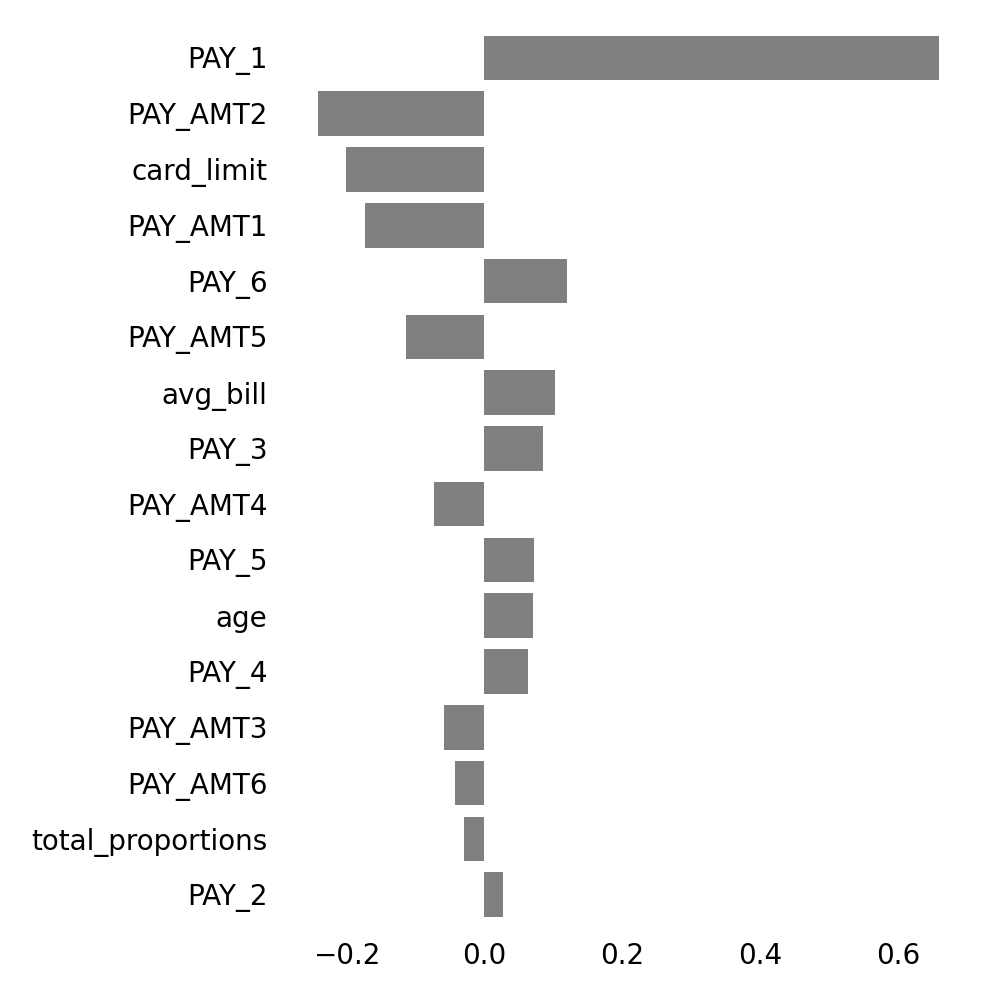

In [46]:
#plotting

fig, ax = plt.subplots(figsize = (5, 5))

sns.barplot(x=best_lr.coef_.reshape(-1)[index[::-1]], y=columns[index[::-1]], color="gray", ax=ax)
plt.tight_layout()
plt.box(False)
plt.tick_params(left=False, bottom=False)


In [47]:
#Remember the data has been scaled to have a standard deviation above. The calculation below
#tells us that for each month a customer is late in the most recent month, their odds of
#defaulting increases by a factor of 2.38.

Xint.PAY_1.std(), np.exp(best_lr.coef_[0][0]/Xint.PAY_1.std())

(0.7593579512680144, 2.382461733829167)

In [48]:
#The log-odds of the target variable being realized are log(p/(1-p)), where p is the
#probability that 
#the target is realized.

int_probs = gridsearch5.predict_proba(Xint_train_scaled)

y_logit = np.log(int_probs[:, 1]/int_probs[:, 0])


<IPython.core.display.Javascript object>


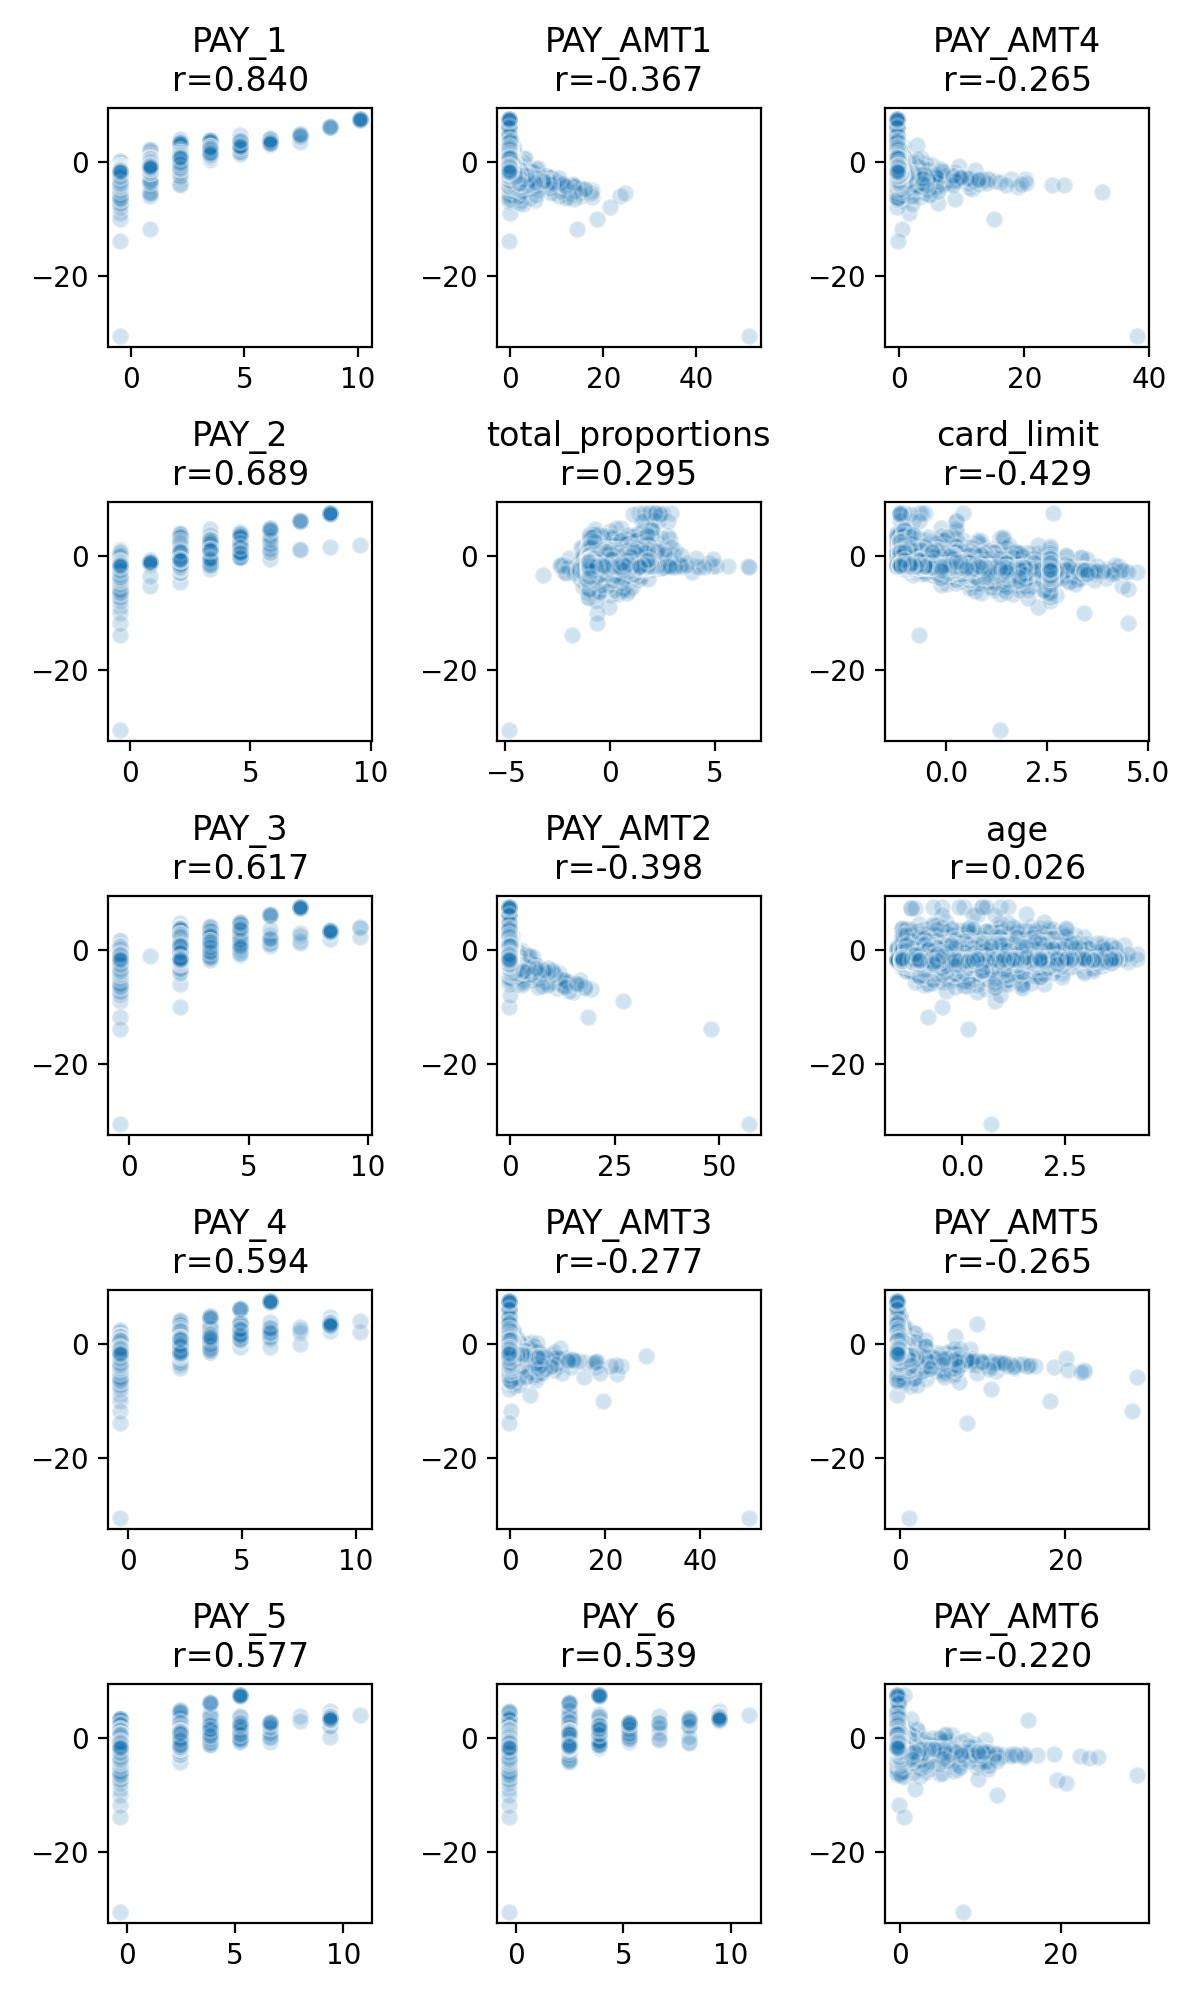

In [49]:
#plotting to check linearity.

fig, axes = plt.subplots(5, 3)

fig.set_size_inches(6, 10)
for i in range(15):
    axes[i%5, i//5].scatter(Xint_train_scaled[:, i], y_logit, alpha=.2, edgecolor="white")
    r = np.corrcoef(Xint_train_scaled[:, i], y_logit)[0,1]
    axes[i%5, i//5].title.set_text(Xint_train.columns[i] + f"\nr={r:.3f}")

plt.tight_layout()

<b>Linear Relations</b>

Some of the features show a reasonably linear relationship to the log-odds of y=1. Others do not. This is not simply a function of the strength of the coefficients either. Some features, such as PAY_AMT1 have a relatively large coefficient, but a low absolute value for <i>r</i>.

One question is what score of <i>r</i> we should treat as our cutoff. We're getting pretty low on variables here, and I want the model to retain some predictive power. Variables for which $|r| > .5$ will be used.

This means 6 variables: PAY_1 - PAY_6.

<b>Building an Object</b>

For the sake of keeping data and scores internal to a single object, I will build another class.

In [50]:
class InterpretableRegressor:
    def __init__(self, random_state1=None, random_state2=None):
        
        from sklearn.model_selection import train_test_split, GridSearchCV
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import roc_curve
        
        self.lr = LogisticRegression(solver="liblinear", random_state=random_state1)
        self.random_state = random_state2
    
    def fit(self, X, y):
        
        from sklearn.model_selection import train_test_split, GridSearchCV
        from sklearn.linear_model import LogisticRegression
        
        self.X_train, self.X_test, self.y_train, self.y_test = (train_test_split
                                                                (X[[f"PAY_{N}" for N 
                                                                     in range(1,7)]],y, 
                                                                  random_state=self.random_state))

        self.grid = GridSearchCV(estimator = self.lr, 
                                 param_grid = {"penalty": ["l1", "l2"], 
                                               "C":[.001, .01, .1, 1, 10, 100, 1000]},
                                scoring="accuracy")
        
        self.grid.fit(self.X_train, self.y_train)
        
        return self.grid.cv_results_
    
    def get_scores(self):
        from sklearn.metrics import roc_auc_score
        train_acc = self.grid.score(self.X_train, self.y_train)
        train_roc = roc_auc_score(self.y_train, self.grid.predict_proba(self.X_train)[:,1])
        test_acc = self.grid.score(self.X_test, self.y_test)
        test_roc = roc_auc_score(self.y_test, self.grid.predict_proba(self.X_test)[:,1])
        
        return {"train roc auc": train_roc, "train accuracy": train_acc,
               "test roc auc": test_roc, "test accuracy": test_acc}
    
    def get_roc(self):
        from sklearn.metrics import roc_curve, roc_auc_score
        probs = self.grid.predict_proba(self.X_test)[:,1]
        return roc_curve(self.y_test, probs)
    
    def score(self, X, y):
        from sklearn.metrics import roc_curve, roc_auc_score
        Xobj = X.copy()
        Xobj = Xobj[[f"PAY_{N}"for N in range(1,7)]]
        
        return {"accuracy": self.grid.score(Xobj, y),
               "roc_auc": roc_auc_score(y, self.grid.predict_proba(Xobj)[:,1])}
    
    def calculate_roc(self, X, y):
        Xobj = X.copy()
        Xobj = Xobj[[f"PAY_{N}"for N in range(1,7)]]
        probs = self.grid.predict_proba(Xobj)[:, 1]
        
        return roc_curve(y, probs)

In [51]:
intelligible_lr = InterpretableRegressor(random_state1=14, random_state2=15)

intelligible_lr.fit(X2, y2)

{'mean_fit_time': array([0.01792765, 0.01543417, 0.02043223, 0.0172658 , 0.01916442,
        0.01733818, 0.01925097, 0.02225199, 0.0207449 , 0.02122312,
        0.02679625, 0.02301078, 0.02171288, 0.01792307]),
 'std_fit_time': array([4.55582103e-03, 1.53862911e-03, 1.35420824e-03, 8.43456060e-05,
        3.71082709e-04, 6.81696208e-04, 4.55055186e-04, 3.40641171e-03,
        1.31221367e-03, 1.62262297e-03, 5.78722873e-04, 2.76917976e-03,
        2.57078888e-03, 5.17954547e-04]),
 'mean_score_time': array([0.00370507, 0.00197005, 0.00202508, 0.00197039, 0.00197773,
        0.00198116, 0.00197425, 0.00264015, 0.00203924, 0.00221858,
        0.00261426, 0.00235019, 0.00229926, 0.00217056]),
 'std_score_time': array([3.26007969e-03, 3.36645007e-05, 1.26563254e-04, 1.83229603e-05,
        3.26987930e-05, 1.78228692e-05, 1.58870520e-05, 5.17006422e-04,
        8.44811466e-05, 2.25803949e-04, 1.49591120e-04, 3.45974312e-04,
        4.67777408e-04, 3.02458264e-04]),
 'param_C': masked_array(d

In [52]:
intelligible_lr.get_scores()

{'train roc auc': 0.7367089930747196,
 'train accuracy': 0.8121307189542484,
 'test roc auc': 0.7253601681410444,
 'test accuracy': 0.8211764705882353}

<IPython.core.display.Javascript object>


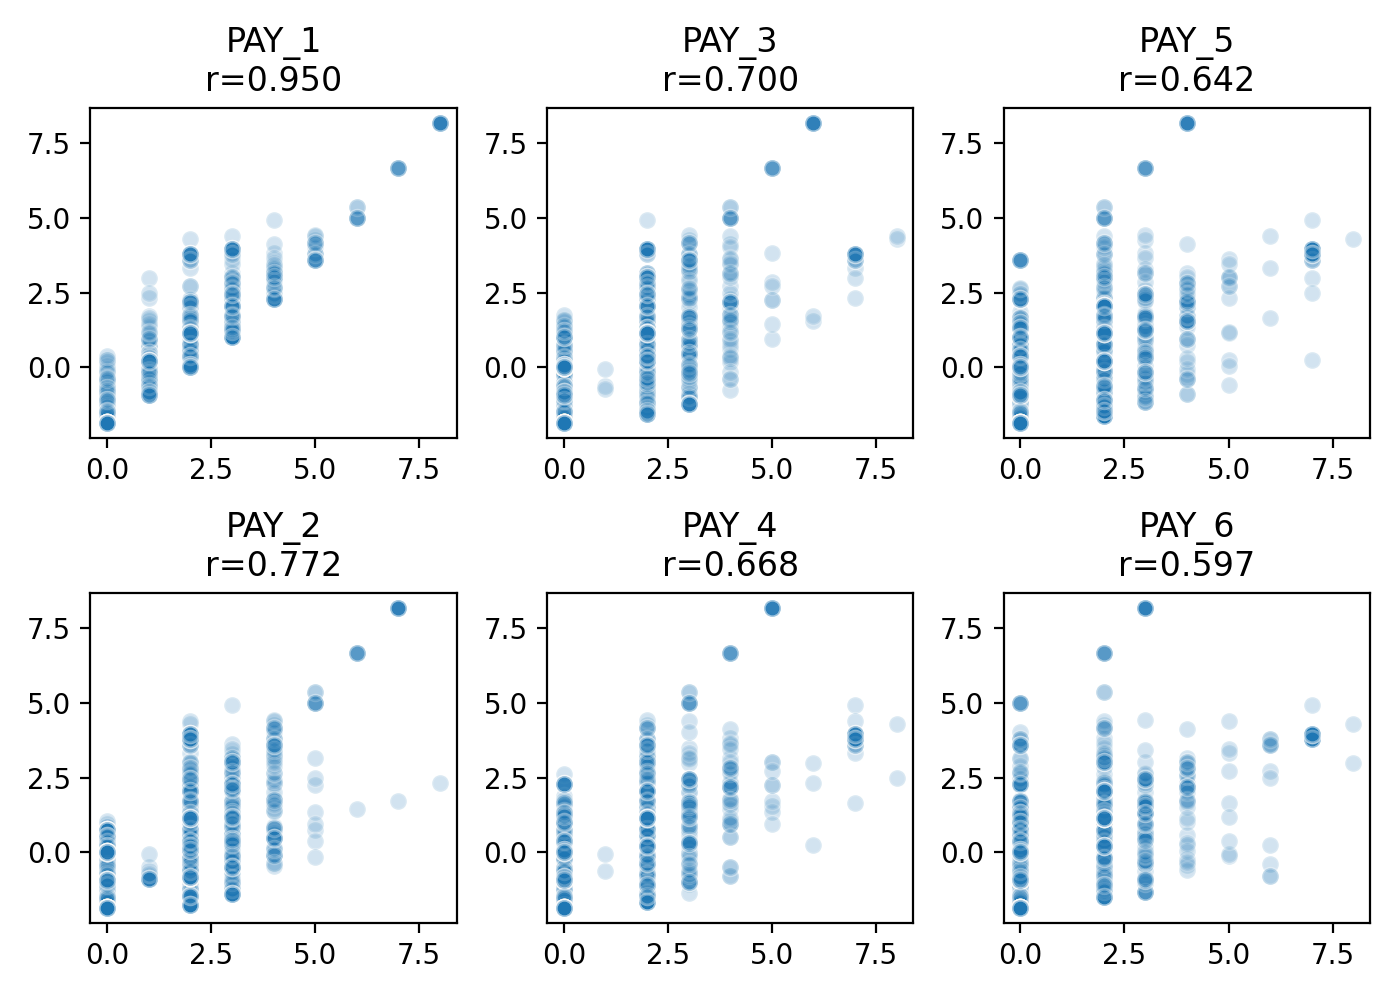

In [53]:
probs_short = intelligible_lr.grid.predict_proba(intelligible_lr.X_train)
y_logit_short = np.log(probs_short[:,1]/probs_short[:,0])

fig, axes = plt.subplots(2, 3)

fig.set_size_inches(7, 5)
for i in range(6):
    axes[i%2, i//2].scatter(intelligible_lr.X_train.iloc[:, i], y_logit_short, alpha=.2,
                           edgecolor="white")
    r = np.corrcoef(intelligible_lr.X_train.iloc[:, i], y_logit_short)[0,1]
    axes[i%2, i//2].title.set_text(f"PAY_{i+1}" + f"\nr={r:.3f}")

fig.tight_layout()
#plt.savefig("linearity_test.png", dpi=300)

<b>Linearity</b>

*r* > .5 for all features in the model. In one case *r* = .95. This indicates moderate to high linearity.

But do the features look linear? In a few cases, PAY_3 and PAY_4, for example, it looks like we have two separate trends.

However, notice what is going on. Look at the points in the top-right corner of PAY_1, representing customers who are 7 and 8 months late, respectively. Those same dots appear in PAY_2, as customers who are 6 and 7 months late. They then appear again in PAY_3, shift a little further to the right, as 5 and 6 months late. In short, some customers who are  6 months late in PAY_3 have higher odds of defaulting than customers who are 8 months late, because those same customers will be 8 months late by PAY_1. (If this is unclear, please see the [powerpoint slide](https://www.dropbox.com/sh/38tcjlw7gb7bvka/AABsPtsNWq7yXZpuBqO1-_qNa?dl=0), pp. 18-20, where it is easier to circle the offending dots.) If we ignore these two dots, the relationship in the other months looks more decidedly linear.

The graphs below show what happens when we drop customers who are 7 or 8 months late in PAY_1. The appearance of a second trend-line disappers, and PAY_3 and PAY_4 look more straightforwardly linear--althought we should note that *r* does decrease very slightly, so maybe the visual test is just misleading in this case. Even after dropping these datapoints, the coefficients remain fairly similar. The biggest change is PAY_2, which increases by .041. For some sense of the difference this makes, assume a customer is 6 months late in PAY_2. His odds of defaulting, according to the model that includes the datapoints, increase about 1.3-fold relative to the customer who is 0 months late; whereas according to the model that excludes the datapoints, his odds of defaulting increasing 1.7-fold. So even at fairly extreme values, the differences in predicted odds of defaulting are modest.

*Given that the coefficients are relatively similar whether we drop the offending data points or not*, I judge that assumption of linearity is met well-enough, as long as we are aware it isn't perfect.

<IPython.core.display.Javascript object>


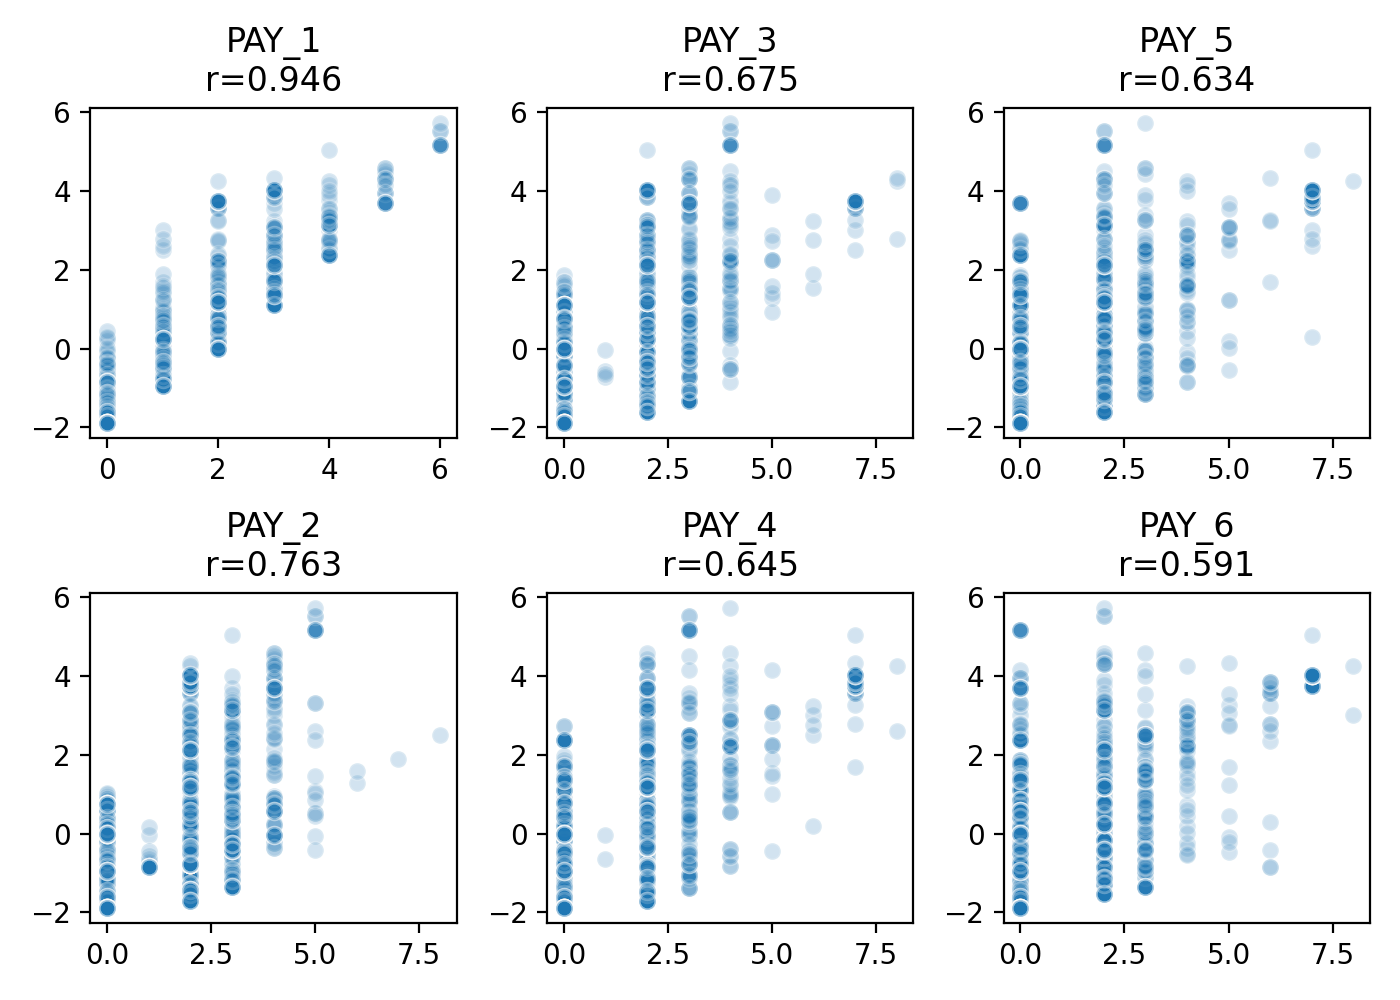

In [55]:
X_short = X2[[f"PAY_{N}" for N in range(1, 7)]].copy()

X_short_d = X_short[~((X_short.PAY_1==8)|(X_short.PAY_1==7))]

y2_d = y2[y2.index.isin(X_short_d.index)]

lr5 = LogisticRegression()

gridsearch5 = GridSearchCV(estimator=lr5, param_grid={"C":[.001, .01, .1, 1, 10, 100]},
                          scoring="accuracy")

gridsearch5.fit(X_short_d, y2_d)

probs_short = gridsearch5.predict_proba(X_short_d)
y_logit_short = np.log(probs_short[:,1]/probs_short[:,0])

fig, axes = plt.subplots(2, 3)

fig.set_size_inches(7, 5)
for i in range(6):
    axes[i%2, i//2].scatter(X_short_d.iloc[:, i], y_logit_short, alpha=.2,
                           edgecolor="white")
    r = np.corrcoef(X_short_d.iloc[:, i], y_logit_short)[0,1]
    axes[i%2, i//2].title.set_text(f"PAY_{i+1}" + f"\nr={r:.3f}")

fig.tight_layout()
#plt.savefig("lin_test_dropped.png", dpi=300)

In [56]:
gridsearch5.best_estimator_.coef_

array([[0.9312671 , 0.08908567, 0.13173397, 0.07827284, 0.12862713,
        0.17332284]])

In [57]:
np.exp(gridsearch5.best_estimator_.coef_)

array([[2.5377227 , 1.09317431, 1.14080479, 1.08141768, 1.13726599,
        1.18924998]])

In [58]:
intelligible_lr.grid.best_estimator_.coef_

array([[0.92249907, 0.04815861, 0.14885981, 0.09425241, 0.1060902 ,
        0.1782338 ]])

In [59]:
np.exp(intelligible_lr.grid.best_estimator_.coef_)

array([[2.51556912, 1.04933708, 1.16051029, 1.09883707, 1.11192217,
        1.19510471]])

In [60]:
#The models have slightly different coefficients, depending on whether we train them using
#all the data points, or drop the people who are 7 or 8 months late in the final month.
#The biggest difference is the coefficient for PAY_2. Doing a little bit of math, we can see
#how serious the difference in the coefficients is. Imagine a customer is six months late in
#month PAY_2. Using the model that trained on all data points, this customer's odds of
#defaulting increase by a factor of 1.3. The model that dropped the most extreme data points
#increases the odds by a factor of 1.7. This seems like a small change in odds for a fairly
#extreme case. The models seem pretty similar.

1.093**6, 1.049**6

(1.7049866063073411, 1.3324561607077807)

<b>Reflection</b>

The resulting model fall slightly short of the predictive power of the original Logisitic Regression model. ROC AUC of .734 vs. .725. At the same time, we have a highly interpretable model. Depending on our interests, the resulting model might be preferable to the more predictive ones.

The following section will include a table 

In [66]:
a = np.append(intelligible_lr.grid.best_estimator_.coef_[0],
              intelligible_lr.grid.best_estimator_.intercept_)

index = [f"PAY_{N}" for N in range(1,7)] + ["starting_odds"]

Odds = pd.Series(index=index, data = np.round(np.exp(a),2))

In [67]:
Odds

PAY_1            2.52
PAY_2            1.05
PAY_3            1.16
PAY_4            1.10
PAY_5            1.11
PAY_6            1.20
starting_odds    0.16
dtype: float64

<b>Explanation</b>

The above series provides the following information. For each month that a customer is late with payments in the most recent pay period, their odds of defaulting increasing approximately 2.52-fold. For each month they were late in any earlier pay period, up to six months ago, their odds of defaulting increase approximately 1.05- to 1.2-fold (depending). Base odds of defaulting are 1 to 6.25.

<b>Time to Verify the Models</b>

We will be repeating verification for the Random Forest model, which was already verified in Part I. But we can compare performance with the new Logistic Regression model.

In [68]:
X_sealed, y_sealed = data_processing(hermetically_sealed_data)

In [69]:
X_sealed.head()

,card_limit,sex,age,edu_other_1,edu_other_2,edu_other_3,edu_other_4,postgraduate,undergraduate,high_school,...,gap_4,gap_5,gap_6,proportion_gap_1,proportion_gap_2,proportion_gap_3,proportion_gap_4,proportion_gap_5,proportion_gap_6,total_proportions
10172,410000.0,1,48,0,0,0,0,0,0,1,...,-5535.0,729.0,14296.0,-0.090837,0.065120,0.013934,-0.013500,0.001778,0.034868,0.011363
24003,20000.0,0,27,0,0,1,0,0,0,0,...,18809.0,20113.0,19840.0,1.083650,1.052550,1.022000,0.940450,1.005650,0.992000,6.096300
11635,160000.0,1,27,0,0,0,0,1,0,0,...,-1535.0,1718.0,-2487.0,-0.016244,0.008150,-0.003625,-0.009594,0.010738,-0.015544,-0.026119
4173,200000.0,0,48,0,0,0,0,0,1,0,...,0.0,0.0,0.0,1.025750,0.000000,0.000000,0.000000,0.000000,0.000000,1.025750
2109,60000.0,1,22,0,0,0,0,0,1,0,...,12207.0,17744.0,6242.0,0.178633,-0.540783,-0.040883,0.203450,0.295733,0.104033,0.200183


In [70]:
#testing the Random Forest Classifier on the Validation Set

gridsearch4.score(X_sealed, y_sealed), np.mean(gridsearch4.predict(X_sealed)==y_sealed)

(0.7818678920943292, 0.8211111111111111)

In [71]:
#testing the more interpretable model

intelligible_lr.score(X_sealed, y_sealed)

{'accuracy': 0.8193333333333334, 'roc_auc': 0.7413569425572124}

<b>Final Evaluation</b>

See [Part I](https://github.com/dr-mentaculus/Credit_Card_Project/blob/main/credit_card_Part_I.ipynb) for the source fo the scores for the "Heavy Processing" model.

In [72]:
results = {"Random Forest": [.788, .782, .819, .821], 
           "Logistic Regression - (Heavy Processing)":[.772, .772, .753, .751],
          "Logistic Regression - (Easy to Read)": [.725, .741, .821, .819]}

columns = ["ROC_AUC_test", "ROC_AUC_valid", "Accuracy_test", "Accuracy_valid"]

metrics = pd.DataFrame.from_dict(columns=columns, data=results, orient="index")
metrics

,ROC_AUC_test,ROC_AUC_valid,Accuracy_test,Accuracy_valid
Random Forest,0.788,0.782,0.819,0.821
Logistic Regression - (Heavy Processing),0.772,0.772,0.753,0.751
Logistic Regression - (Easy to Read),0.725,0.741,0.821,0.819


In [73]:
forest_probs = gridsearch4.predict_proba(X_sealed)[:,1]
roc1 = roc_curve(y_sealed, forest_probs)

#roc2 = heavy_lr.calculate_roc(X_sealed, y_sealed)
roc3 = intelligible_lr.calculate_roc(X_sealed, y_sealed)


<IPython.core.display.Javascript object>


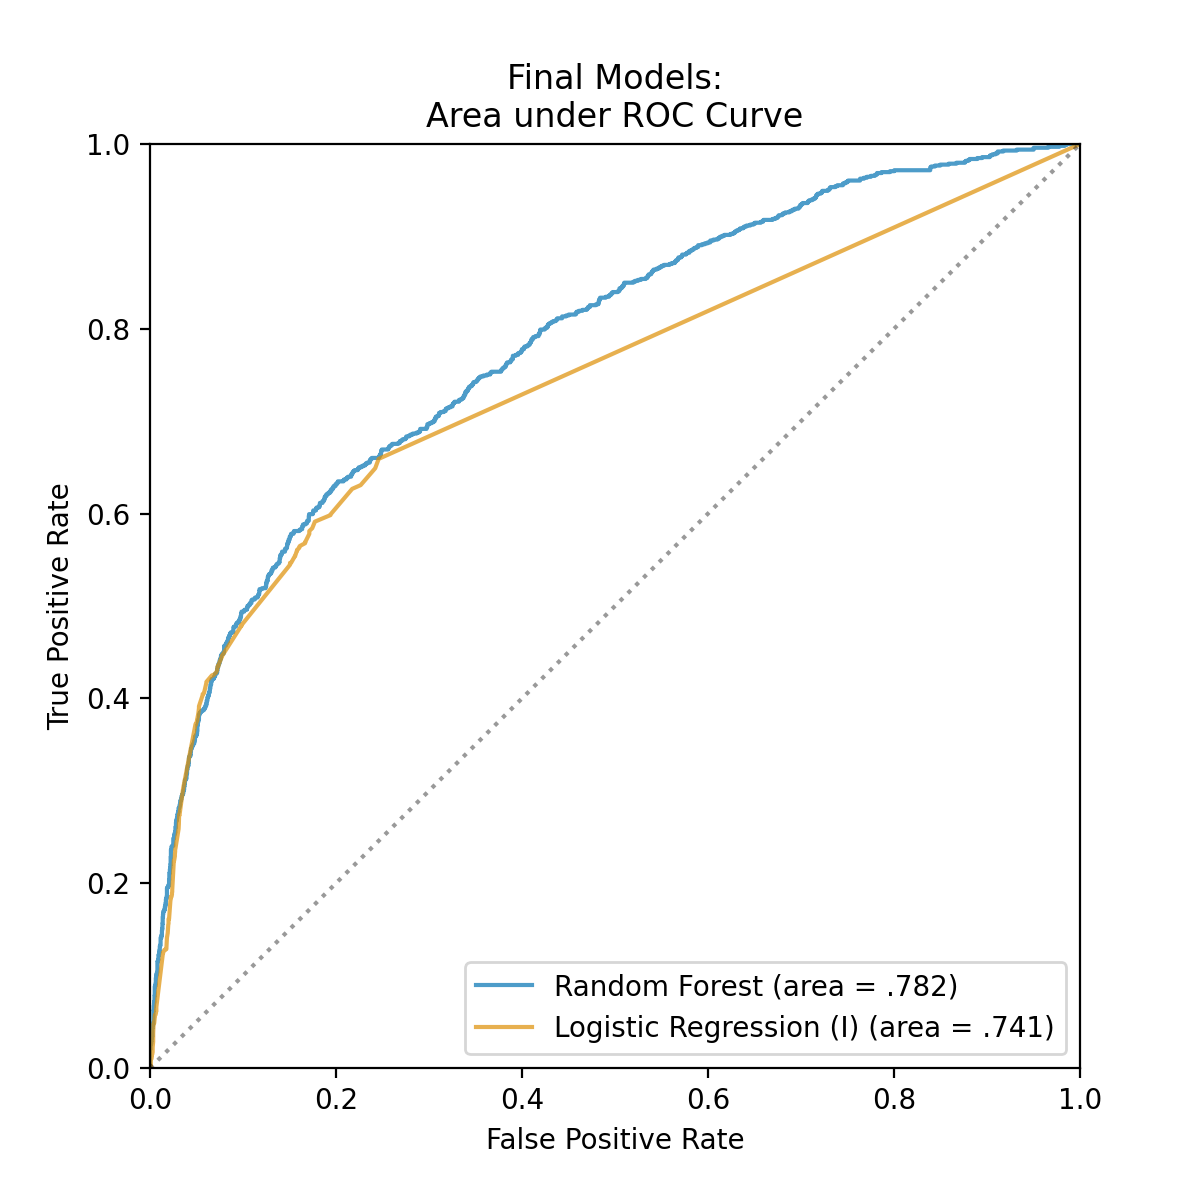

In [80]:
t = sns.color_palette("colorblind")

plt.figure(figsize=[6, 6])
plt.title("Final Models:\nArea under ROC Curve")
plt.plot(roc1[0], roc1[1], alpha=.7, color = t[0], label="Random Forest (area = .782)")
#plt.plot(roc2[0], roc2[1], alpha=.7, color = t[1], label="Logistic Regression (H) (area = .771)")
plt.plot(roc3[0], roc3[1], alpha=.7, color = t[1], label="Logistic Regression (I) (area = .741)")
plt.plot([0,1], [0,1], color="black", alpha=.4, linestyle=":")
plt.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim(0, 1)
plt.ylim(0, 1)

#plt.savefig("treevsinterpret.png", dpi=300)

<b>Final Comments</b>

Looking at the curves, it appears that the sparse model, using only 6 variables, is limited in its ability to separate defautling and non-defaulting customers. After the False Positive rate reaches .25 or so, the relation between increasing False Positives and increasing True Positives becomes linear.

Interestingly, while the ROC score of the more interpretable model suffers, the accuracy of its predictions is higher than the model using more heavily processed data.